### Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

def movie_class(row):
    if row['rating'] <= 2:
        return "низкий рейтинг"
    elif row['rating'] < 4.5:
        return "низкий рейтинг"
    else:
        return "высокий рейтинг"


# movies = pd.read_csv('ml-latest-small/movies.csv')
# print(movies.head())
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings['movie_class'] = ratings.apply(movie_class, axis = 1)
print(ratings.head())


   userId  movieId  rating   timestamp     movie_class
0       1       31     2.5  1260759144  низкий рейтинг
1       1     1029     3.0  1260759179  низкий рейтинг
2       1     1061     3.0  1260759182  низкий рейтинг
3       1     1129     2.0  1260759185  низкий рейтинг
4       1     1172     4.0  1260759205  низкий рейтинг


### Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:
```Python
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
```
Результат классификации запишите в отдельный столбец region.

In [2]:
%%time

import pandas as pd

data = pd.read_csv('keywords.csv')

geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

def get_region(row):
    for geo in geo_data.items():
        region = geo[0]
        for city in geo[1]:
            if city in row['keyword']:
                return region
    return 'undefined'

data['region'] = data.apply(get_region, axis=1)
print(data.head())
print(data['region'].value_counts())

         keyword     shows     region
0             вк  64292779  undefined
1  одноклассники  63810309  undefined
2          порно  41747114  undefined
3           ютуб  39995567  undefined
4      вконтакте  21014195  undefined
undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64
Wall time: 19.4 s


### Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.
2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

    1. для каждой строки пройдите по всем годам списка years
    2. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’
4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

Wall time: 7.79 s


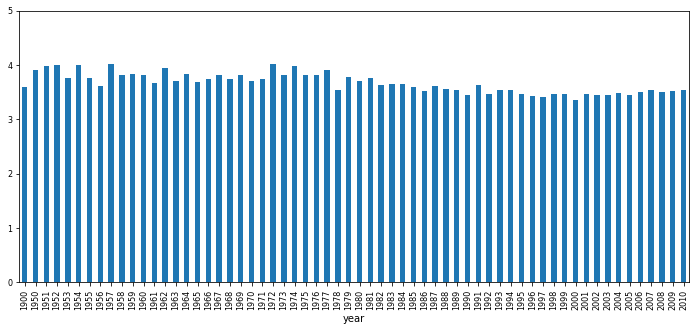

In [3]:
%%time
%matplotlib inline

import pandas as pd
import re

movies = pd.read_csv('ml-latest-small/movies.csv')
# print(movies.head())
ratings = pd.read_csv('ml-latest-small/ratings.csv')
# print(ratings.head())
ratings_names = ratings.merge(movies[['movieId','title']], on='movieId', how='left')
# print(ratings_names.head())

year_start = 1950
year_end = 2010
years = range(year_start, year_end+1)

regex = '(\(\d{4}\))'

def production_year(row, default_year):
    if re.search(regex,row['title']):
        year = re.findall(regex,row['title'])
        year = year[0][1:5]
        if int(year) in years:
            return int(year) 
    return default_year

ratings_names['year'] = ratings_names.apply(production_year, default_year = 1900, axis = 1)
# print(ratings_names.head())
(ratings_names.sort_values('year', ascending=False)
 .groupby('year')
 .agg({'rating': 'mean'})
)['rating'].plot(kind = 'bar', figsize=(12,5), fontsize = 8, yticks = range(0,5+1))
